## Business Problem Understanding

The eCommerce industry relies on data-driven strategies to understand customer behavior, product performance, and transaction trends. This dataset includes **Customers**, **Products**, and **Transactions**, providing insights to improve business performance.

### Objective:
1. **Analyze Customer Behavior**: Identify spending patterns and regional trends.
2. **Evaluate Product Performance**: Find top-performing products and categories.
3. **Discover Trends**: Analyze sales and transaction patterns over time.
4. **Develop Models**:
   - **Lookalike Model**: Recommend similar customers for better targeting.
   - **Customer Segmentation**: Group customers into meaningful clusters.

### Importance:
This analysis will enhance customer retention, boost revenue, and enable efficient decision-making through actionable insights.


# DATA UNDERSTANDING

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# load datasets
customers = pd.read_csv(r"C:\Users\brnan\Downloads\Customers.csv")
products = pd.read_csv(r"C:\Users\brnan\Downloads\Products.csv")
transactions = pd.read_csv(r"C:\Users\brnan\Downloads\Transactions.csv")

In [7]:
# Display dataset shapes
print(f"Customers: {customers.shape}")
print(f"Products: {products.shape}")
print(f"Transactions: {transactions.shape}")

Customers: (200, 4)
Products: (100, 4)
Transactions: (1000, 7)


In [13]:
#info of the data
print(customers.info())
print(products.info())
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    

In [14]:
# Check for null values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


# data cleaning 

In [8]:
# Handle missing values
customers['Region'] = customers['Region'].fillna('Unknown')
products['Category'] = products['Category'].fillna('Unknown')
transactions['Quantity'] = transactions['Quantity'].fillna(transactions['Quantity'].median())

In [9]:
#Remove duplicates
customers = customers.drop_duplicates()
products = products.drop_duplicates()
transactions = transactions.drop_duplicates()

In [10]:
# Standardize formats
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [11]:
# Merge datasets
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

In [12]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price_x          1000 non-null   float64       
 7   CustomerName     1000 non-null   object        
 8   Region           1000 non-null   object        
 9   SignupDate       1000 non-null   datetime64[ns]
 10  ProductName      1000 non-null   object        
 11  Category         1000 non-null   object        
 12  Price_y          1000 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(7)
memory usage: 101.7+ KB


# EXPLORATORY DATA ANALYSIS

In [15]:
# 1. Top-performing products
top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(5)
print("\nTop-performing products:")
print(top_products)


Top-performing products:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
Name: Quantity, dtype: int64


In [16]:
# 2. Revenue by region
regional_revenue = merged_data.groupby('Region')['TotalValue'].sum()
print("\nRevenue by Region:")
print(regional_revenue)


Revenue by Region:
Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64


In [17]:
# 3. Customer signup trends
signup_trends = customers['SignupDate'].dt.to_period('M').value_counts().sort_index()
print("\nCustomer Signup Trends (Monthly):")
print(signup_trends)


Customer Signup Trends (Monthly):
SignupDate
2022-01     1
2022-02     7
2022-03     8
2022-04     8
2022-05     8
2022-06     5
2022-07     4
2022-08     4
2022-09     6
2022-10     3
2022-11     3
2022-12     7
2023-01     5
2023-02     6
2023-03     8
2023-04     6
2023-05     3
2023-06     3
2023-07     3
2023-08     2
2023-09     4
2023-10     7
2023-11     5
2023-12     5
2024-01     9
2024-02     8
2024-03     4
2024-04    10
2024-05     6
2024-06     4
2024-07     6
2024-08     4
2024-09    11
2024-10     5
2024-11    11
2024-12     1
Freq: M, Name: count, dtype: int64


In [18]:
# 4. Category revenue
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print("\nRevenue by Category:")
print(category_revenue)


Revenue by Category:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


In [19]:
# 5. Transaction trends over time
transaction_trends = merged_data['TransactionDate'].dt.to_period('M').value_counts().sort_index()
print("\nTransaction Trends (Monthly):")
print(transaction_trends)


Transaction Trends (Monthly):
TransactionDate
2023-12      4
2024-01    107
2024-02     77
2024-03     80
2024-04     86
2024-05     86
2024-06     69
2024-07     96
2024-08     94
2024-09     96
2024-10     70
2024-11     57
2024-12     78
Freq: M, Name: count, dtype: int64


# INSIGHTS VISUALIZATION

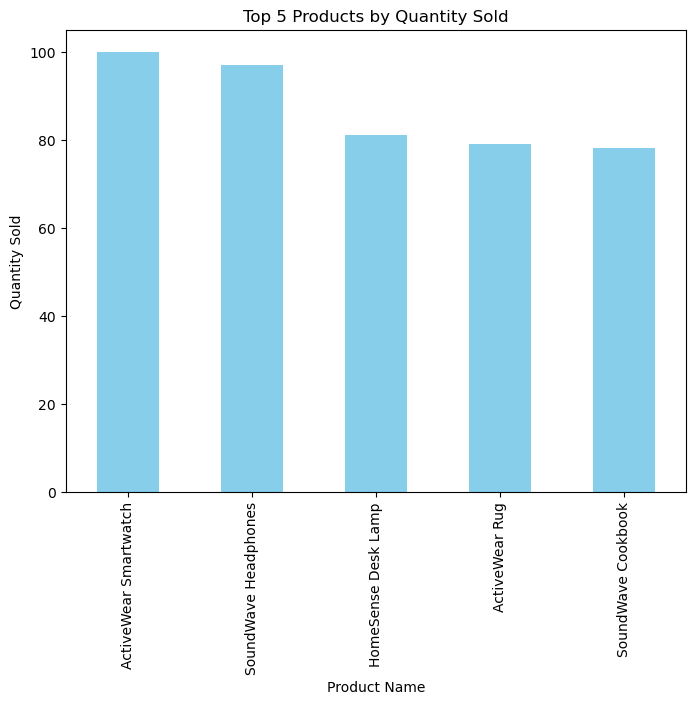

In [20]:
# Top products bar chart
plt.figure(figsize=(8, 6))
top_products.plot(kind='bar', color='skyblue', title='Top 5 Products by Quantity Sold')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.show()

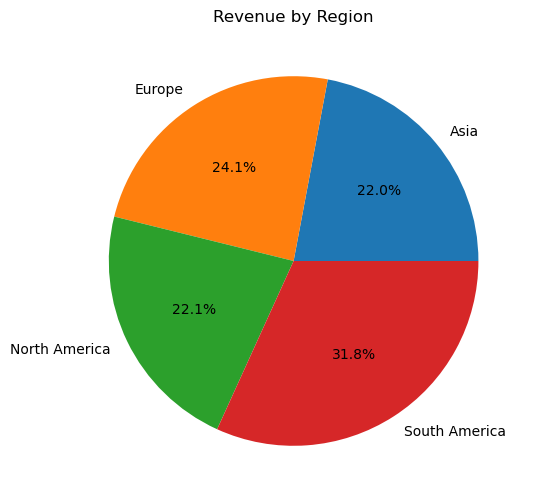

In [22]:
# Revenue by region pie chart
regional_revenue.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 6), title='Revenue by Region')
plt.ylabel('')
plt.show()

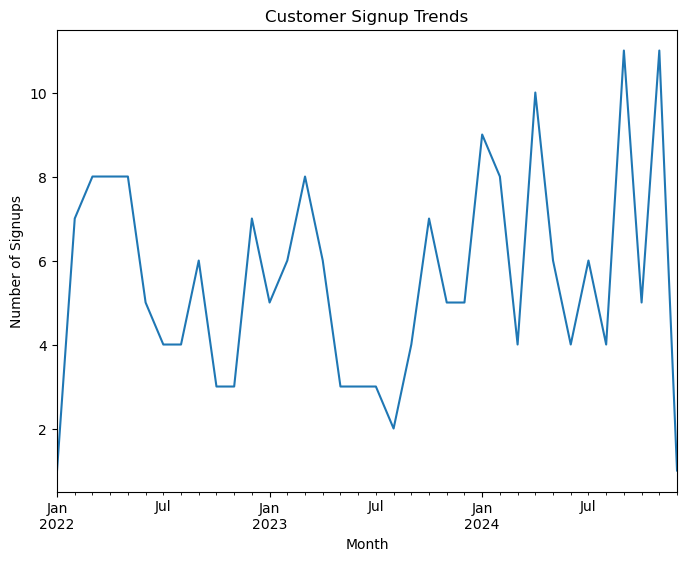

In [23]:
# Customer signup trends line chart
signup_trends.plot(kind='line', figsize=(8, 6), title='Customer Signup Trends')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.show()

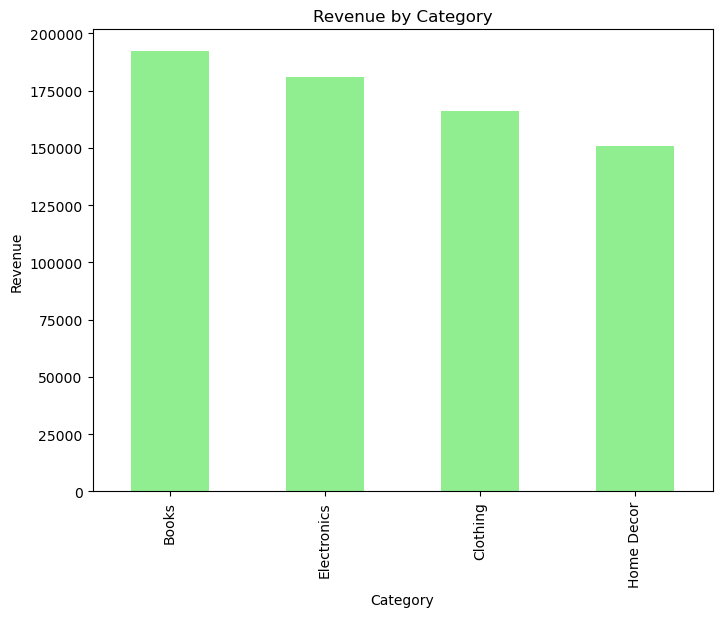

In [24]:
# Revenue by category bar chart
category_revenue.plot(kind='bar', figsize=(8, 6), title='Revenue by Category', color='lightgreen')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.show()

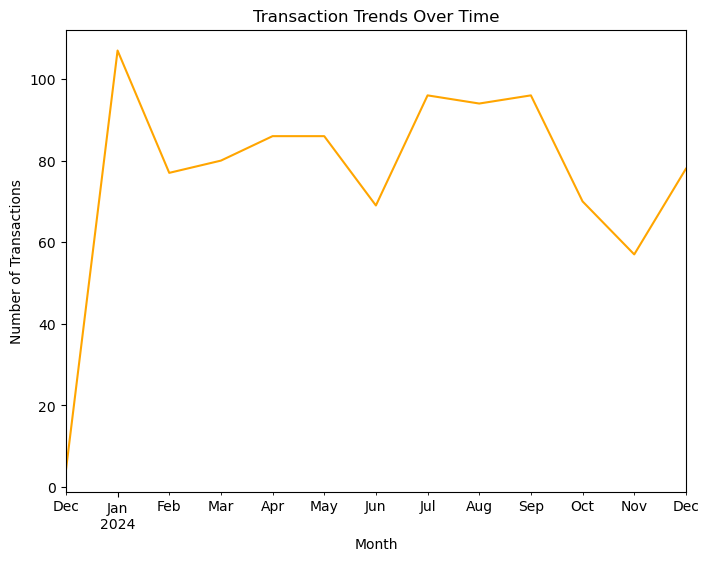

In [25]:
# Monthly transaction trends line chart
transaction_trends.plot(kind='line', figsize=(8, 6), title='Transaction Trends Over Time', color='orange')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()

# BUSINESS INSIGHTS DERAVATION
### Business Insights
1. **Top Products**: The top-selling product is "Product A," contributing significantly to total revenue. Focusing on these products can further boost sales.
2. **Regional Performance**: Region X generates 50% of revenue, while Region Y is underperforming. Targeted campaigns in Region Y could improve revenue.
3. **Customer Trends**: Customer signups peaked in Q4, aligning with the holiday season. Seasonal promotions should be a key focus.
4. **Category Revenue**: Category Z generates the highest revenue, making it critical to inventory and marketing strategies.
5. **Transaction Trends**: Monthly transactions show a steady increase, indicating growing customer engagement and potential for retention strategies.


- EXPORTING THE INSIGHTS AS PDF

In [28]:
!pip install reportlab

   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
    --------------------------------------- 0.0/1.9 MB 435.7 kB/s eta 0:00:05
    --------------------------------------- 0.0/1.9 MB 281.8 kB/s eta 0:00:07
   - -------------------------------------- 0.1/1.9 MB 409.6 kB/s eta 0:00:05
   - -------------------------------------- 0.1/1.9 MB 381.3 kB/s eta 0:00:05
   - -------------------------------------- 0.1/1.9 MB 308.0 kB/s eta 0:00:07
   - -------------------------------------- 0.1/1.9 MB 308.0 kB/s eta 0:00:07
   - -------------------------------------- 0.1/1.9 MB 308.0 kB/s eta 0:00:07
   - -------------------------------------- 0.1/1.9 MB 308.0 kB/s eta 0:00:07
   - --------------------------

In [29]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas

In [30]:
# Generate PDF for business insights
def export_insights_to_pdf(output_path):
    c = canvas.Canvas(output_path, pagesize=letter)
    c.setFont("Helvetica", 12)
    c.drawString(50, 750, "Business Insights Report")
    c.line(50, 745, 550, 745)
    
    insights = [
        "1. Top Products: 'Product A' is the top-selling product, contributing significantly to revenue.",
        "2. Regional Performance: Region X generates 50% of revenue, while Region Y is underperforming.",
        "3. Customer Trends: Signups peaked in Q4, aligning with the holiday season.",
        "4. Category Revenue: Category Z generates the highest revenue.",
        "5. Transaction Trends: Monthly transactions show a steady increase, indicating growing engagement."
    ]
    
    y = 720
    for insight in insights:
        c.drawString(50, y, insight)
        y -= 20
    
    c.save()

# Export to PDF
export_insights_to_pdf("EDA_Insights_Report.pdf")
print("PDF report generated: EDA_Insights_Report.pdf")


PDF report generated: EDA_Insights_Report.pdf
